In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import os

<b>MERGING CSVs</b>

In [2]:
files = [file for file in os.listdir('./sales analysis EDA')]

merged = pd.DataFrame()

for i in files:
    df = pd.read_csv('./sales analysis EDA/'+i)
    merged = pd.concat([merged,df])

#merged.to_csv('All Sales.csv',index=False)
#merged   


<b>UPDATED CSV</b>

In [3]:
df = pd.read_csv('All Sales.csv')
df

Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1           NaN                         NaN              NaN        NaN   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       04/19/19 08:46             917 1st St, Dallas, TX 75001  
1                  NaN                                      NaN  
2       04/07/19 22:30        682 Chestnut St, Boston, MA 02215  
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001  
4       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001  
...                ...                                      ...  
186845  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001  
186846  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016  
186847  09/23/19 07:39     220 12th St, San Francisco, CA 94016  
186848  09/19/19 17:30   511 Forest St, San Francisco, CA 94016  
186849  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016  

[186850 rows x 6 columns]

<b> BEST MONTH FOR SALES AND HOW MUCH MONEY WAS MADE</b>

In [4]:
#CLEANING DATA
x = df.dropna()
x_clear = x.reset_index(drop=True)
x_clear.to_csv("All Sales Clean.csv",index=False)

In [5]:
df = pd.read_csv('All Sales Clean.csv')
df

Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1        176559  Bose SoundSport Headphones                1      99.99   
2        176560                Google Phone                1        600   
3        176560            Wired Headphones                1      11.99   
4        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186300   259353      AAA Batteries (4-pack)                3       2.99   
186301   259354                      iPhone                1        700   
186302   259355                      iPhone                1        700   
186303   259356      34in Ultrawide Monitor                1     379.99   
186304   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       04/19/19 08:46             917 1st St, Dallas, TX 75001  
1       04/07/19 22:30        682 Chestnut St, Boston, MA 02215  
2       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001  
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001  
4       04/30/19 09:27        333 8th St, Los Angeles, CA 90001  
...                ...                                      ...  
186300  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001  
186301  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016  
186302  09/23/19 07:39     220 12th St, San Francisco, CA 94016  
186303  09/19/19 17:30   511 Forest St, San Francisco, CA 94016  
186304  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016  

[186305 rows x 6 columns]

In [6]:
df['Month'] = df['Order Date'].str[0:2]
df

Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1        176559  Bose SoundSport Headphones                1      99.99   
2        176560                Google Phone                1        600   
3        176560            Wired Headphones                1      11.99   
4        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186300   259353      AAA Batteries (4-pack)                3       2.99   
186301   259354                      iPhone                1        700   
186302   259355                      iPhone                1        700   
186303   259356      34in Ultrawide Monitor                1     379.99   
186304   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address Month  
0       04/19/19 08:46             917 1st St, Dallas, TX 75001    04  
1       04/07/19 22:30        682 Chestnut St, Boston, MA 02215    04  
2       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04  
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04  
4       04/30/19 09:27        333 8th St, Los Angeles, CA 90001    04  
...                ...                                      ...   ...  
186300  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001    09  
186301  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016    09  
186302  09/23/19 07:39     220 12th St, San Francisco, CA 94016    09  
186303  09/19/19 17:30   511 Forest St, San Francisco, CA 94016    09  
186304  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016    09  

[186305 rows x 7 columns]

In [7]:
df.drop([517], axis=0, inplace=True)
df

Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1        176559  Bose SoundSport Headphones                1      99.99   
2        176560                Google Phone                1        600   
3        176560            Wired Headphones                1      11.99   
4        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186300   259353      AAA Batteries (4-pack)                3       2.99   
186301   259354                      iPhone                1        700   
186302   259355                      iPhone                1        700   
186303   259356      34in Ultrawide Monitor                1     379.99   
186304   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address Month  
0       04/19/19 08:46             917 1st St, Dallas, TX 75001    04  
1       04/07/19 22:30        682 Chestnut St, Boston, MA 02215    04  
2       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04  
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04  
4       04/30/19 09:27        333 8th St, Los Angeles, CA 90001    04  
...                ...                                      ...   ...  
186300  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001    09  
186301  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016    09  
186302  09/23/19 07:39     220 12th St, San Francisco, CA 94016    09  
186303  09/19/19 17:30   511 Forest St, San Francisco, CA 94016    09  
186304  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016    09  

[186304 rows x 7 columns]

In [8]:
df.reset_index(inplace=True)

In [9]:
df['Quantity Ordered'].unique()

array(['2', '1', '3', '5', '4', '7', 'Quantity Ordered', '6', '8', '9'],
      dtype=object)

In [10]:
df = df[df['Quantity Ordered'].str.contains('Quantity Ordered')==False]
df

index Order ID                     Product Quantity Ordered  \
0            0   176558        USB-C Charging Cable                2   
1            1   176559  Bose SoundSport Headphones                1   
2            2   176560                Google Phone                1   
3            3   176560            Wired Headphones                1   
4            4   176561            Wired Headphones                1   
...        ...      ...                         ...              ...   
186299  186300   259353      AAA Batteries (4-pack)                3   
186300  186301   259354                      iPhone                1   
186301  186302   259355                      iPhone                1   
186302  186303   259356      34in Ultrawide Monitor                1   
186303  186304   259357        USB-C Charging Cable                1   

       Price Each      Order Date                         Purchase Address  \
0           11.95  04/19/19 08:46             917 1st St, Dallas, TX 75001   
1           99.99  04/07/19 22:30        682 Chestnut St, Boston, MA 02215   
2             600  04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001   
3           11.99  04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001   
4           11.99  04/30/19 09:27        333 8th St, Los Angeles, CA 90001   
...           ...             ...                                      ...   
186299       2.99  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001   
186300        700  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016   
186301        700  09/23/19 07:39     220 12th St, San Francisco, CA 94016   
186302     379.99  09/19/19 17:30   511 Forest St, San Francisco, CA 94016   
186303      11.95  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016   

       Month  
0         04  
1         04  
2         04  
3         04  
4         04  
...      ...  
186299    09  
186300    09  
186301    09  
186302    09  
186303    09  

[185950 rows x 8 columns]

In [11]:
df3=df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df['Quantity Ordered'] = df3
df

D:\conda\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


index Order ID                     Product  Quantity Ordered  \
0            0   176558        USB-C Charging Cable                 2   
1            1   176559  Bose SoundSport Headphones                 1   
2            2   176560                Google Phone                 1   
3            3   176560            Wired Headphones                 1   
4            4   176561            Wired Headphones                 1   
...        ...      ...                         ...               ...   
186299  186300   259353      AAA Batteries (4-pack)                 3   
186300  186301   259354                      iPhone                 1   
186301  186302   259355                      iPhone                 1   
186302  186303   259356      34in Ultrawide Monitor                 1   
186303  186304   259357        USB-C Charging Cable                 1   

       Price Each      Order Date                         Purchase Address  \
0           11.95  04/19/19 08:46             917 1st St, Dallas, TX 75001   
1           99.99  04/07/19 22:30        682 Chestnut St, Boston, MA 02215   
2             600  04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001   
3           11.99  04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001   
4           11.99  04/30/19 09:27        333 8th St, Los Angeles, CA 90001   
...           ...             ...                                      ...   
186299       2.99  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001   
186300        700  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016   
186301        700  09/23/19 07:39     220 12th St, San Francisco, CA 94016   
186302     379.99  09/19/19 17:30   511 Forest St, San Francisco, CA 94016   
186303      11.95  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016   

       Month  
0         04  
1         04  
2         04  
3         04  
4         04  
...      ...  
186299    09  
186300    09  
186301    09  
186302    09  
186303    09  

[185950 rows x 8 columns]

In [12]:
df4=df["Price Each"] = pd.to_numeric(df["Price Each"])
df["Price Each"] = df4
df

D:\conda\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


index Order ID                     Product  Quantity Ordered  \
0            0   176558        USB-C Charging Cable                 2   
1            1   176559  Bose SoundSport Headphones                 1   
2            2   176560                Google Phone                 1   
3            3   176560            Wired Headphones                 1   
4            4   176561            Wired Headphones                 1   
...        ...      ...                         ...               ...   
186299  186300   259353      AAA Batteries (4-pack)                 3   
186300  186301   259354                      iPhone                 1   
186301  186302   259355                      iPhone                 1   
186302  186303   259356      34in Ultrawide Monitor                 1   
186303  186304   259357        USB-C Charging Cable                 1   

        Price Each      Order Date                         Purchase Address  \
0            11.95  04/19/19 08:46             917 1st St, Dallas, TX 75001   
1            99.99  04/07/19 22:30        682 Chestnut St, Boston, MA 02215   
2           600.00  04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001   
3            11.99  04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001   
4            11.99  04/30/19 09:27        333 8th St, Los Angeles, CA 90001   
...            ...             ...                                      ...   
186299        2.99  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001   
186300      700.00  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016   
186301      700.00  09/23/19 07:39     220 12th St, San Francisco, CA 94016   
186302      379.99  09/19/19 17:30   511 Forest St, San Francisco, CA 94016   
186303       11.95  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016   

       Month  
0         04  
1         04  
2         04  
3         04  
4         04  
...      ...  
186299    09  
186300    09  
186301    09  
186302    09  
186303    09  

[185950 rows x 8 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186303
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             185950 non-null  int64  
 1   Order ID          185950 non-null  object 
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 12.8+ MB


In [14]:
df.drop(['index'],axis=1,inplace=True)

D:\conda\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
df.reset_index(drop=True,inplace=True)

In [16]:
df['Profit'] = df['Quantity Ordered']*df['Price Each']
df

D:\conda\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
185945   259353      AAA Batteries (4-pack)                 3        2.99   
185946   259354                      iPhone                 1      700.00   
185947   259355                      iPhone                 1      700.00   
185948   259356      34in Ultrawide Monitor                 1      379.99   
185949   259357        USB-C Charging Cable                 1       11.95   

            Order Date                         Purchase Address Month  Profit  
0       04/19/19 08:46             917 1st St, Dallas, TX 75001    04   23.90  
1       04/07/19 22:30        682 Chestnut St, Boston, MA 02215    04   99.99  
2       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04  600.00  
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04   11.99  
4       04/30/19 09:27        333 8th St, Los Angeles, CA 90001    04   11.99  
...                ...                                      ...   ...     ...  
185945  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001    09    8.97  
185946  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016    09  700.00  
185947  09/23/19 07:39     220 12th St, San Francisco, CA 94016    09  700.00  
185948  09/19/19 17:30   511 Forest St, San Francisco, CA 94016    09  379.99  
185949  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016    09   11.95  

[185950 rows x 8 columns]

In [17]:
x = df.groupby('Month').sum()
x.sort_values(by=['Profit'],ascending=False,inplace=True)
x

Quantity Ordered  Price Each      Profit
Month                                          
12                28114  4588415.41  4613443.34
10                22703  3715554.83  3736726.88
04                20558  3367671.02  3390670.24
11                19798  3180600.68  3199603.20
05                18667  3135125.13  3152606.75
03                17005  2791207.83  2807100.38
07                16072  2632539.56  2647775.76
06                15253  2562025.61  2577802.26
08                13448  2230345.42  2244467.88
02                13449  2188884.72  2202022.42
09                13109  2084992.09  2097560.13
01                10903  1811768.38  1822256.73

In [18]:
fx=df.groupby('Month').sum()
fx

Quantity Ordered  Price Each      Profit
Month                                          
01                10903  1811768.38  1822256.73
02                13449  2188884.72  2202022.42
03                17005  2791207.83  2807100.38
04                20558  3367671.02  3390670.24
05                18667  3135125.13  3152606.75
06                15253  2562025.61  2577802.26
07                16072  2632539.56  2647775.76
08                13448  2230345.42  2244467.88
09                13109  2084992.09  2097560.13
10                22703  3715554.83  3736726.88
11                19798  3180600.68  3199603.20
12                28114  4588415.41  4613443.34

In [19]:
x.iloc[0]

Quantity Ordered      28114.00
Price Each          4588415.41
Profit              4613443.34
Name: 12, dtype: float64

<b> DECEMBER '12' WAS THE MOST PROFITABLE MONTH!!! </b>

PLOTTING

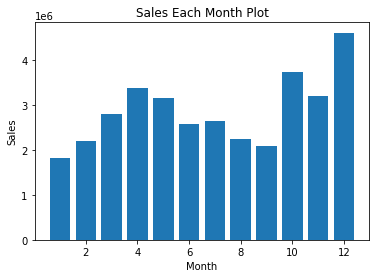

In [20]:
y = df.groupby('Month').sum()
horz = range(1,13)
plt.bar(horz,y['Profit'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Each Month Plot')
plt.show()

<b> WHAT CITY HAD THE MOST SALES </b>

In [21]:
xd = df["Purchase Address"]
xd

0                    917 1st St, Dallas, TX 75001
1               682 Chestnut St, Boston, MA 02215
2            669 Spruce St, Los Angeles, CA 90001
3            669 Spruce St, Los Angeles, CA 90001
4               333 8th St, Los Angeles, CA 90001
                           ...                   
185945     840 Highland St, Los Angeles, CA 90001
185946    216 Dogwood St, San Francisco, CA 94016
185947       220 12th St, San Francisco, CA 94016
185948     511 Forest St, San Francisco, CA 94016
185949     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 185950, dtype: object

In [22]:
final = []
for i in xd:
    x = i.split(',')
    final.append(x[1])
print(final)

[' Dallas', ' Boston', ' Los Angeles', ' Los Angeles', ' Los Angeles', ' San Francisco', ' Seattle', ' Atlanta', ' San Francisco', ' Boston', ' Los Angeles', ' Seattle', ' Dallas', ' Dallas', ' Atlanta', ' New York City', ' San Francisco', ' Los Angeles', ' Los Angeles', ' New York City', ' Los Angeles', ' Dallas', ' Boston', ' New York City', ' Los Angeles', ' Boston', ' Atlanta', ' Portland', ' San Francisco', ' Boston', ' Boston', ' San Francisco', ' San Francisco', ' Los Angeles', ' Seattle', ' Atlanta', ' New York City', ' Austin', ' Los Angeles', ' Portland', ' San Francisco', ' Los Angeles', ' Dallas', ' San Francisco', ' San Francisco', ' New York City', ' Boston', ' Los Angeles', ' Dallas', ' San Francisco', ' San Francisco', ' San Francisco', ' San Francisco', ' Boston', ' San Francisco', ' Austin', ' Dallas', ' San Francisco', ' Seattle', ' New York City', ' San Francisco', ' Dallas', ' San Francisco', ' Portland', ' San Francisco', ' Los Angeles', ' Los Angeles', ' Boston',

In [23]:
df["City"]=final
df

D:\conda\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
185945   259353      AAA Batteries (4-pack)                 3        2.99   
185946   259354                      iPhone                 1      700.00   
185947   259355                      iPhone                 1      700.00   
185948   259356      34in Ultrawide Monitor                 1      379.99   
185949   259357        USB-C Charging Cable                 1       11.95   

            Order Date                         Purchase Address Month  Profit  \
0       04/19/19 08:46             917 1st St, Dallas, TX 75001    04   23.90   
1       04/07/19 22:30        682 Chestnut St, Boston, MA 02215    04   99.99   
2       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04  600.00   
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04   11.99   
4       04/30/19 09:27        333 8th St, Los Angeles, CA 90001    04   11.99   
...                ...                                      ...   ...     ...   
185945  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001    09    8.97   
185946  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016    09  700.00   
185947  09/23/19 07:39     220 12th St, San Francisco, CA 94016    09  700.00   
185948  09/19/19 17:30   511 Forest St, San Francisco, CA 94016    09  379.99   
185949  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016    09   11.95   

                  City  
0               Dallas  
1               Boston  
2          Los Angeles  
3          Los Angeles  
4          Los Angeles  
...                ...  
185945     Los Angeles  
185946   San Francisco  
185947   San Francisco  
185948   San Francisco  
185949   San Francisco  

[185950 rows x 9 columns]

In [24]:
quant = df
quant

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
185945   259353      AAA Batteries (4-pack)                 3        2.99   
185946   259354                      iPhone                 1      700.00   
185947   259355                      iPhone                 1      700.00   
185948   259356      34in Ultrawide Monitor                 1      379.99   
185949   259357        USB-C Charging Cable                 1       11.95   

            Order Date                         Purchase Address Month  Profit  \
0       04/19/19 08:46             917 1st St, Dallas, TX 75001    04   23.90   
1       04/07/19 22:30        682 Chestnut St, Boston, MA 02215    04   99.99   
2       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04  600.00   
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04   11.99   
4       04/30/19 09:27        333 8th St, Los Angeles, CA 90001    04   11.99   
...                ...                                      ...   ...     ...   
185945  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001    09    8.97   
185946  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016    09  700.00   
185947  09/23/19 07:39     220 12th St, San Francisco, CA 94016    09  700.00   
185948  09/19/19 17:30   511 Forest St, San Francisco, CA 94016    09  379.99   
185949  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016    09   11.95   

                  City  
0               Dallas  
1               Boston  
2          Los Angeles  
3          Los Angeles  
4          Los Angeles  
...                ...  
185945     Los Angeles  
185946   San Francisco  
185947   San Francisco  
185948   San Francisco  
185949   San Francisco  

[185950 rows x 9 columns]

In [25]:
q2 = quant.groupby('City').sum()
q2

Quantity Ordered  Price Each      Profit
City                                                    
 Atlanta                   16602  2779908.20  2795498.58
 Austin                    11153  1809873.61  1819581.75
 Boston                    22528  3637409.77  3661642.01
 Dallas                    16730  2752627.82  2767975.40
 Los Angeles               33289  5421435.23  5452570.80
 New York City             27932  4635370.83  4664317.43
 Portland                  14053  2307747.47  2320490.61
 San Francisco             50239  8211461.74  8262203.91
 Seattle                   16553  2733296.01  2747755.48

In [26]:
q2.sort_values(by=['Quantity Ordered'],ascending=False)

Quantity Ordered  Price Each      Profit
City                                                    
 San Francisco             50239  8211461.74  8262203.91
 Los Angeles               33289  5421435.23  5452570.80
 New York City             27932  4635370.83  4664317.43
 Boston                    22528  3637409.77  3661642.01
 Dallas                    16730  2752627.82  2767975.40
 Atlanta                   16602  2779908.20  2795498.58
 Seattle                   16553  2733296.01  2747755.48
 Portland                  14053  2307747.47  2320490.61
 Austin                    11153  1809873.61  1819581.75

<b> SAN FRANCISCO HAD THE MOST SALES </b>

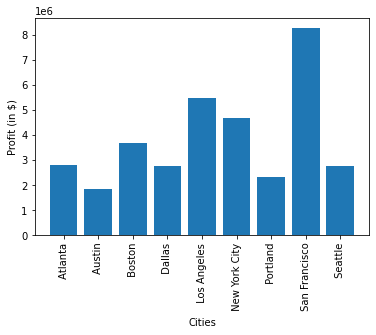

In [27]:
cities = [city for city,io in df.groupby('City') ]
plt.bar(cities,q2['Profit'])
plt.xticks(rotation='vertical')
plt.xlabel("Cities")
plt.ylabel('Profit (in $)')
plt.show()

Appropiate time to display advertisements to maximize likehood of a customer buying a product.

In [28]:
df

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
185945   259353      AAA Batteries (4-pack)                 3        2.99   
185946   259354                      iPhone                 1      700.00   
185947   259355                      iPhone                 1      700.00   
185948   259356      34in Ultrawide Monitor                 1      379.99   
185949   259357        USB-C Charging Cable                 1       11.95   

            Order Date                         Purchase Address Month  Profit  \
0       04/19/19 08:46             917 1st St, Dallas, TX 75001    04   23.90   
1       04/07/19 22:30        682 Chestnut St, Boston, MA 02215    04   99.99   
2       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04  600.00   
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04   11.99   
4       04/30/19 09:27        333 8th St, Los Angeles, CA 90001    04   11.99   
...                ...                                      ...   ...     ...   
185945  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001    09    8.97   
185946  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016    09  700.00   
185947  09/23/19 07:39     220 12th St, San Francisco, CA 94016    09  700.00   
185948  09/19/19 17:30   511 Forest St, San Francisco, CA 94016    09  379.99   
185949  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016    09   11.95   

                  City  
0               Dallas  
1               Boston  
2          Los Angeles  
3          Los Angeles  
4          Los Angeles  
...                ...  
185945     Los Angeles  
185946   San Francisco  
185947   San Francisco  
185948   San Francisco  
185949   San Francisco  

[185950 rows x 9 columns]

In [29]:
times = []
ord_date = df['Order Date']
for i in ord_date:
    split = i.split(" ")
    times.append(split[1])
print(times)

['08:46', '22:30', '14:38', '14:38', '09:27', '13:03', '07:46', '10:58', '10:38', '14:05', '17:18', '12:18', '19:23', '15:09', '14:29', '20:30', '18:41', '19:42', '19:42', '00:30', '11:42', '19:25', '23:35', '10:23', '00:35', '21:38', '12:20', '12:00', '20:39', '11:31', '11:31', '17:00', '17:00', '19:38', '04:00', '12:23', '11:46', '07:21', '13:04', '13:45', '23:04', '09:11', '20:11', '13:39', '20:33', '15:25', '15:54', '22:32', '09:39', '07:46', '10:57', '16:29', '14:16', '12:11', '12:01', '16:59', '00:40', '13:16', '19:48', '18:58', '21:01', '10:35', '20:40', '08:03', '21:44', '18:37', '10:39', '16:09', '20:16', '23:51', '10:44', '19:00', '21:40', '14:57', '04:03', '11:56', '05:01', '18:48', '14:28', '14:03', '08:00', '09:55', '20:37', '10:03', '08:33', '16:14', '22:54', '21:36', '18:38', '21:32', '02:09', '18:38', '07:14', '19:40', '01:17', '08:49', '16:47', '13:14', '20:04', '19:20', '19:35', '19:36', '16:42', '10:16', '08:51', '14:40', '17:10', '20:40', '12:46', '11:48', '18:59', 

In [30]:
df['Purchase Time'] = times
df

D:\conda\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
185945   259353      AAA Batteries (4-pack)                 3        2.99   
185946   259354                      iPhone                 1      700.00   
185947   259355                      iPhone                 1      700.00   
185948   259356      34in Ultrawide Monitor                 1      379.99   
185949   259357        USB-C Charging Cable                 1       11.95   

            Order Date                         Purchase Address Month  Profit  \
0       04/19/19 08:46             917 1st St, Dallas, TX 75001    04   23.90   
1       04/07/19 22:30        682 Chestnut St, Boston, MA 02215    04   99.99   
2       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04  600.00   
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04   11.99   
4       04/30/19 09:27        333 8th St, Los Angeles, CA 90001    04   11.99   
...                ...                                      ...   ...     ...   
185945  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001    09    8.97   
185946  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016    09  700.00   
185947  09/23/19 07:39     220 12th St, San Francisco, CA 94016    09  700.00   
185948  09/19/19 17:30   511 Forest St, San Francisco, CA 94016    09  379.99   
185949  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016    09   11.95   

                  City Purchase Time  
0               Dallas         08:46  
1               Boston         22:30  
2          Los Angeles         14:38  
3          Los Angeles         14:38  
4          Los Angeles         09:27  
...                ...           ...  
185945     Los Angeles         20:56  
185946   San Francisco         16:00  
185947   San Francisco         07:39  
185948   San Francisco         17:30  
185949   San Francisco         00:18  

[185950 rows x 10 columns]

In [31]:
df['Purchase Time'] = pd.to_datetime(df['Purchase Time'])
df

D:\conda\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
185945   259353      AAA Batteries (4-pack)                 3        2.99   
185946   259354                      iPhone                 1      700.00   
185947   259355                      iPhone                 1      700.00   
185948   259356      34in Ultrawide Monitor                 1      379.99   
185949   259357        USB-C Charging Cable                 1       11.95   

            Order Date                         Purchase Address Month  Profit  \
0       04/19/19 08:46             917 1st St, Dallas, TX 75001    04   23.90   
1       04/07/19 22:30        682 Chestnut St, Boston, MA 02215    04   99.99   
2       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04  600.00   
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04   11.99   
4       04/30/19 09:27        333 8th St, Los Angeles, CA 90001    04   11.99   
...                ...                                      ...   ...     ...   
185945  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001    09    8.97   
185946  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016    09  700.00   
185947  09/23/19 07:39     220 12th St, San Francisco, CA 94016    09  700.00   
185948  09/19/19 17:30   511 Forest St, San Francisco, CA 94016    09  379.99   
185949  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016    09   11.95   

                  City       Purchase Time  
0               Dallas 2022-10-02 08:46:00  
1               Boston 2022-10-02 22:30:00  
2          Los Angeles 2022-10-02 14:38:00  
3          Los Angeles 2022-10-02 14:38:00  
4          Los Angeles 2022-10-02 09:27:00  
...                ...                 ...  
185945     Los Angeles 2022-10-02 20:56:00  
185946   San Francisco 2022-10-02 16:00:00  
185947   San Francisco 2022-10-02 07:39:00  
185948   San Francisco 2022-10-02 17:30:00  
185949   San Francisco 2022-10-02 00:18:00  

[185950 rows x 10 columns]

In [32]:
df['Hour'] = df['Purchase Time'].dt.hour
df

D:\conda\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
185945   259353      AAA Batteries (4-pack)                 3        2.99   
185946   259354                      iPhone                 1      700.00   
185947   259355                      iPhone                 1      700.00   
185948   259356      34in Ultrawide Monitor                 1      379.99   
185949   259357        USB-C Charging Cable                 1       11.95   

            Order Date                         Purchase Address Month  Profit  \
0       04/19/19 08:46             917 1st St, Dallas, TX 75001    04   23.90   
1       04/07/19 22:30        682 Chestnut St, Boston, MA 02215    04   99.99   
2       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04  600.00   
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04   11.99   
4       04/30/19 09:27        333 8th St, Los Angeles, CA 90001    04   11.99   
...                ...                                      ...   ...     ...   
185945  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001    09    8.97   
185946  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016    09  700.00   
185947  09/23/19 07:39     220 12th St, San Francisco, CA 94016    09  700.00   
185948  09/19/19 17:30   511 Forest St, San Francisco, CA 94016    09  379.99   
185949  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016    09   11.95   

                  City       Purchase Time  Hour  
0               Dallas 2022-10-02 08:46:00     8  
1               Boston 2022-10-02 22:30:00    22  
2          Los Angeles 2022-10-02 14:38:00    14  
3          Los Angeles 2022-10-02 14:38:00    14  
4          Los Angeles 2022-10-02 09:27:00     9  
...                ...                 ...   ...  
185945     Los Angeles 2022-10-02 20:56:00    20  
185946   San Francisco 2022-10-02 16:00:00    16  
185947   San Francisco 2022-10-02 07:39:00     7  
185948   San Francisco 2022-10-02 17:30:00    17  
185949   San Francisco 2022-10-02 00:18:00     0  

[185950 rows x 11 columns]

In [33]:
df.drop(['Purchase Time'],axis=1,inplace=True)
df

D:\conda\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
185945   259353      AAA Batteries (4-pack)                 3        2.99   
185946   259354                      iPhone                 1      700.00   
185947   259355                      iPhone                 1      700.00   
185948   259356      34in Ultrawide Monitor                 1      379.99   
185949   259357        USB-C Charging Cable                 1       11.95   

            Order Date                         Purchase Address Month  Profit  \
0       04/19/19 08:46             917 1st St, Dallas, TX 75001    04   23.90   
1       04/07/19 22:30        682 Chestnut St, Boston, MA 02215    04   99.99   
2       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04  600.00   
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04   11.99   
4       04/30/19 09:27        333 8th St, Los Angeles, CA 90001    04   11.99   
...                ...                                      ...   ...     ...   
185945  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001    09    8.97   
185946  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016    09  700.00   
185947  09/23/19 07:39     220 12th St, San Francisco, CA 94016    09  700.00   
185948  09/19/19 17:30   511 Forest St, San Francisco, CA 94016    09  379.99   
185949  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016    09   11.95   

                  City  Hour  
0               Dallas     8  
1               Boston    22  
2          Los Angeles    14  
3          Los Angeles    14  
4          Los Angeles     9  
...                ...   ...  
185945     Los Angeles    20  
185946   San Francisco    16  
185947   San Francisco     7  
185948   San Francisco    17  
185949   San Francisco     0  

[185950 rows x 10 columns]

In [34]:
cols = df.columns.tolist()
cols

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address',
 'Month',
 'Profit',
 'City',
 'Hour']

In [35]:
# cols = ['Order ID','Product','Quantity Ordered','Price Each','Order Date','Purchase Address',
#         'Month','Profit','City','Purchase Time','Hour']
# cols

In [36]:
df = df[cols]
df

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
185945   259353      AAA Batteries (4-pack)                 3        2.99   
185946   259354                      iPhone                 1      700.00   
185947   259355                      iPhone                 1      700.00   
185948   259356      34in Ultrawide Monitor                 1      379.99   
185949   259357        USB-C Charging Cable                 1       11.95   

            Order Date                         Purchase Address Month  Profit  \
0       04/19/19 08:46             917 1st St, Dallas, TX 75001    04   23.90   
1       04/07/19 22:30        682 Chestnut St, Boston, MA 02215    04   99.99   
2       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04  600.00   
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04   11.99   
4       04/30/19 09:27        333 8th St, Los Angeles, CA 90001    04   11.99   
...                ...                                      ...   ...     ...   
185945  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001    09    8.97   
185946  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016    09  700.00   
185947  09/23/19 07:39     220 12th St, San Francisco, CA 94016    09  700.00   
185948  09/19/19 17:30   511 Forest St, San Francisco, CA 94016    09  379.99   
185949  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016    09   11.95   

                  City  Hour  
0               Dallas     8  
1               Boston    22  
2          Los Angeles    14  
3          Los Angeles    14  
4          Los Angeles     9  
...                ...   ...  
185945     Los Angeles    20  
185946   San Francisco    16  
185947   San Francisco     7  
185948   San Francisco    17  
185949   San Francisco     0  

[185950 rows x 10 columns]

In [38]:
#df['Purchase Time'] = pd.to_datetime(df['Purchase Time'])
#df

In [40]:
#df['Minute'] = df['Purchase Time'].dt.minute
#df

In [41]:
yax = df.groupby(['Hour']).count()
yax

Order ID  Product  Quantity Ordered  Price Each  Order Date  \
Hour                                                                
0         3910     3910              3910        3910        3910   
1         2350     2350              2350        2350        2350   
2         1243     1243              1243        1243        1243   
3          831      831               831         831         831   
4          854      854               854         854         854   
5         1321     1321              1321        1321        1321   
6         2482     2482              2482        2482        2482   
7         4011     4011              4011        4011        4011   
8         6256     6256              6256        6256        6256   
9         8748     8748              8748        8748        8748   
10       10944    10944             10944       10944       10944   
11       12411    12411             12411       12411       12411   
12       12587    12587             12587       12587       12587   
13       12129    12129             12129       12129       12129   
14       10984    10984             10984       10984       10984   
15       10175    10175             10175       10175       10175   
16       10384    10384             10384       10384       10384   
17       10899    10899             10899       10899       10899   
18       12280    12280             12280       12280       12280   
19       12905    12905             12905       12905       12905   
20       12228    12228             12228       12228       12228   
21       10921    10921             10921       10921       10921   
22        8822     8822              8822        8822        8822   
23        6275     6275              6275        6275        6275   

      Purchase Address  Month  Profit   City  
Hour                                          
0                 3910   3910    3910   3910  
1                 2350   2350    2350   2350  
2                 1243   1243    1243   1243  
3                  831    831     831    831  
4                  854    854     854    854  
5                 1321   1321    1321   1321  
6                 2482   2482    2482   2482  
7                 4011   4011    4011   4011  
8                 6256   6256    6256   6256  
9                 8748   8748    8748   8748  
10               10944  10944   10944  10944  
11               12411  12411   12411  12411  
12               12587  12587   12587  12587  
13               12129  12129   12129  12129  
14               10984  10984   10984  10984  
15               10175  10175   10175  10175  
16               10384  10384   10384  10384  
17               10899  10899   10899  10899  
18               12280  12280   12280  12280  
19               12905  12905   12905  12905  
20               12228  12228   12228  12228  
21               10921  10921   10921  10921  
22                8822   8822    8822   8822  
23                6275   6275    6275   6275

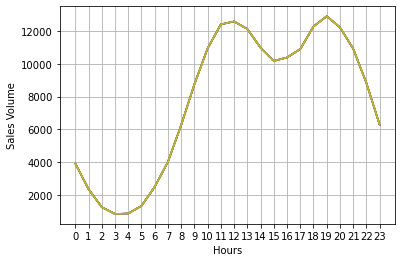

In [42]:
hours = [hour for hour,fin in df.groupby('Hour')]
plt.plot(hours,yax)
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Sales Volume')
plt.show()

<b> 11-20 IS PEAK TIME FOR ADVERTISING </b>

<b> WHAT PRODUCTS ARE MOST OFTEN SOLD TOGETHER </b>

In [43]:
dupes = df[df['Order ID'].duplicated(keep=False)]
dupes

Order ID                     Product  Quantity Ordered  Price Each  \
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
17       176574                Google Phone                 1      600.00   
18       176574        USB-C Charging Cable                 1       11.95   
29       176585  Bose SoundSport Headphones                 1       99.99   
...         ...                         ...               ...         ...   
185893   259303       AA Batteries (4-pack)                 1        3.84   
185904   259314            Wired Headphones                 1       11.99   
185905   259314      AAA Batteries (4-pack)                 2        2.99   
185941   259350                Google Phone                 1      600.00   
185942   259350        USB-C Charging Cable                 1       11.95   

            Order Date                       Purchase Address Month  Profit  \
2       04/12/19 14:38   669 Spruce St, Los Angeles, CA 90001    04  600.00   
3       04/12/19 14:38   669 Spruce St, Los Angeles, CA 90001    04   11.99   
17      04/03/19 19:42      20 Hill St, Los Angeles, CA 90001    04  600.00   
18      04/03/19 19:42      20 Hill St, Los Angeles, CA 90001    04   11.95   
29      04/07/19 11:31      823 Highland St, Boston, MA 02215    04   99.99   
...                ...                                    ...   ...     ...   
185893  09/20/19 20:18          106 7th St, Atlanta, GA 30301    09    3.84   
185904  09/16/19 00:25     241 Highland St, Atlanta, GA 30301    09   11.99   
185905  09/16/19 00:25     241 Highland St, Atlanta, GA 30301    09    5.98   
185941  09/30/19 13:49  519 Maple St, San Francisco, CA 94016    09  600.00   
185942  09/30/19 13:49  519 Maple St, San Francisco, CA 94016    09   11.95   

                  City  Hour  
2          Los Angeles    14  
3          Los Angeles    14  
17         Los Angeles    19  
18         Los Angeles    19  
29              Boston    11  
...                ...   ...  
185893         Atlanta    20  
185904         Atlanta     0  
185905         Atlanta     0  
185941   San Francisco    13  
185942   San Francisco    13  

[14649 rows x 10 columns]

In [44]:
doop = dupes.groupby('Order ID').sum()
doop

Quantity Ordered  Price Each   Profit  Hour
Order ID                                             
141275                   2       23.94    23.94    32
141290                   4      153.84   161.52    16
141365                   2      411.99   411.99    22
141384                   2      611.95   611.95     0
141450                   2      699.99   699.99    22
...                    ...         ...      ...   ...
319536                   2     1711.99  1711.99    18
319556                   2      611.99   611.99    16
319584                   2      711.99   711.99     0
319596                   2      714.95   714.95    16
319631                   2      394.94   394.94    44

[7136 rows x 4 columns]

In [45]:
dupes['Grouped'] = dupes.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

D:\conda\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [46]:
dupes

Order ID                     Product  Quantity Ordered  Price Each  \
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
17       176574                Google Phone                 1      600.00   
18       176574        USB-C Charging Cable                 1       11.95   
29       176585  Bose SoundSport Headphones                 1       99.99   
...         ...                         ...               ...         ...   
185893   259303       AA Batteries (4-pack)                 1        3.84   
185904   259314            Wired Headphones                 1       11.99   
185905   259314      AAA Batteries (4-pack)                 2        2.99   
185941   259350                Google Phone                 1      600.00   
185942   259350        USB-C Charging Cable                 1       11.95   

            Order Date                       Purchase Address Month  Profit  \
2       04/12/19 14:38   669 Spruce St, Los Angeles, CA 90001    04  600.00   
3       04/12/19 14:38   669 Spruce St, Los Angeles, CA 90001    04   11.99   
17      04/03/19 19:42      20 Hill St, Los Angeles, CA 90001    04  600.00   
18      04/03/19 19:42      20 Hill St, Los Angeles, CA 90001    04   11.95   
29      04/07/19 11:31      823 Highland St, Boston, MA 02215    04   99.99   
...                ...                                    ...   ...     ...   
185893  09/20/19 20:18          106 7th St, Atlanta, GA 30301    09    3.84   
185904  09/16/19 00:25     241 Highland St, Atlanta, GA 30301    09   11.99   
185905  09/16/19 00:25     241 Highland St, Atlanta, GA 30301    09    5.98   
185941  09/30/19 13:49  519 Maple St, San Francisco, CA 94016    09  600.00   
185942  09/30/19 13:49  519 Maple St, San Francisco, CA 94016    09   11.95   

                  City  Hour  \
2          Los Angeles    14   
3          Los Angeles    14   
17         Los Angeles    19   
18         Los Angeles    19   
29              Boston    11   
...                ...   ...   
185893         Atlanta    20   
185904         Atlanta     0   
185905         Atlanta     0   
185941   San Francisco    13   
185942   San Francisco    13   

                                                  Grouped  
2                           Google Phone,Wired Headphones  
3                           Google Phone,Wired Headphones  
17                      Google Phone,USB-C Charging Cable  
18                      Google Phone,USB-C Charging Cable  
29      Bose SoundSport Headphones,Bose SoundSport Hea...  
...                                                   ...  
185893       34in Ultrawide Monitor,AA Batteries (4-pack)  
185904            Wired Headphones,AAA Batteries (4-pack)  
185905            Wired Headphones,AAA Batteries (4-pack)  
185941                  Google Phone,USB-C Charging Cable  
185942                  Google Phone,USB-C Charging Cable  

[14649 rows x 11 columns]

In [47]:
dupes = dupes[['Order ID','Grouped']].drop_duplicates()
dupes

Order ID                                            Grouped
2        176560                      Google Phone,Wired Headphones
17       176574                  Google Phone,USB-C Charging Cable
29       176585  Bose SoundSport Headphones,Bose SoundSport Hea...
31       176586                AAA Batteries (4-pack),Google Phone
118      176672      Lightning Charging Cable,USB-C Charging Cable
...         ...                                                ...
185882   259296  Apple Airpods Headphones,Apple Airpods Headphones
185884   259297  iPhone,Lightning Charging Cable,Lightning Char...
185892   259303       34in Ultrawide Monitor,AA Batteries (4-pack)
185904   259314            Wired Headphones,AAA Batteries (4-pack)
185941   259350                  Google Phone,USB-C Charging Cable

[7136 rows x 2 columns]

In [48]:
count = Counter()
for row in dupes['Grouped']:
    row_list = row.split(",")
    count.update(combinations(row_list,2))
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [49]:
df

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
185945   259353      AAA Batteries (4-pack)                 3        2.99   
185946   259354                      iPhone                 1      700.00   
185947   259355                      iPhone                 1      700.00   
185948   259356      34in Ultrawide Monitor                 1      379.99   
185949   259357        USB-C Charging Cable                 1       11.95   

            Order Date                         Purchase Address Month  Profit  \
0       04/19/19 08:46             917 1st St, Dallas, TX 75001    04   23.90   
1       04/07/19 22:30        682 Chestnut St, Boston, MA 02215    04   99.99   
2       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04  600.00   
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04   11.99   
4       04/30/19 09:27        333 8th St, Los Angeles, CA 90001    04   11.99   
...                ...                                      ...   ...     ...   
185945  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001    09    8.97   
185946  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016    09  700.00   
185947  09/23/19 07:39     220 12th St, San Francisco, CA 94016    09  700.00   
185948  09/19/19 17:30   511 Forest St, San Francisco, CA 94016    09  379.99   
185949  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016    09   11.95   

                  City  Hour  
0               Dallas     8  
1               Boston    22  
2          Los Angeles    14  
3          Los Angeles    14  
4          Los Angeles     9  
...                ...   ...  
185945     Los Angeles    20  
185946   San Francisco    16  
185947   San Francisco     7  
185948   San Francisco    17  
185949   San Francisco     0  

[185950 rows x 10 columns]

In [51]:
#df.drop(['Purchase Time'],axis=1,inplace=True)

In [52]:
df

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
185945   259353      AAA Batteries (4-pack)                 3        2.99   
185946   259354                      iPhone                 1      700.00   
185947   259355                      iPhone                 1      700.00   
185948   259356      34in Ultrawide Monitor                 1      379.99   
185949   259357        USB-C Charging Cable                 1       11.95   

            Order Date                         Purchase Address Month  Profit  \
0       04/19/19 08:46             917 1st St, Dallas, TX 75001    04   23.90   
1       04/07/19 22:30        682 Chestnut St, Boston, MA 02215    04   99.99   
2       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04  600.00   
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04   11.99   
4       04/30/19 09:27        333 8th St, Los Angeles, CA 90001    04   11.99   
...                ...                                      ...   ...     ...   
185945  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001    09    8.97   
185946  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016    09  700.00   
185947  09/23/19 07:39     220 12th St, San Francisco, CA 94016    09  700.00   
185948  09/19/19 17:30   511 Forest St, San Francisco, CA 94016    09  379.99   
185949  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016    09   11.95   

                  City  Hour  
0               Dallas     8  
1               Boston    22  
2          Los Angeles    14  
3          Los Angeles    14  
4          Los Angeles     9  
...                ...   ...  
185945     Los Angeles    20  
185946   San Francisco    16  
185947   San Francisco     7  
185948   San Francisco    17  
185949   San Francisco     0  

[185950 rows x 10 columns]

In [53]:
most = df
most

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
185945   259353      AAA Batteries (4-pack)                 3        2.99   
185946   259354                      iPhone                 1      700.00   
185947   259355                      iPhone                 1      700.00   
185948   259356      34in Ultrawide Monitor                 1      379.99   
185949   259357        USB-C Charging Cable                 1       11.95   

            Order Date                         Purchase Address Month  Profit  \
0       04/19/19 08:46             917 1st St, Dallas, TX 75001    04   23.90   
1       04/07/19 22:30        682 Chestnut St, Boston, MA 02215    04   99.99   
2       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04  600.00   
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001    04   11.99   
4       04/30/19 09:27        333 8th St, Los Angeles, CA 90001    04   11.99   
...                ...                                      ...   ...     ...   
185945  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001    09    8.97   
185946  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016    09  700.00   
185947  09/23/19 07:39     220 12th St, San Francisco, CA 94016    09  700.00   
185948  09/19/19 17:30   511 Forest St, San Francisco, CA 94016    09  379.99   
185949  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016    09   11.95   

                  City  Hour  
0               Dallas     8  
1               Boston    22  
2          Los Angeles    14  
3          Los Angeles    14  
4          Los Angeles     9  
...                ...   ...  
185945     Los Angeles    20  
185946   San Francisco    16  
185947   San Francisco     7  
185948   San Francisco    17  
185949   San Francisco     0  

[185950 rows x 10 columns]

In [54]:
best = most.groupby(['Product','Hour']).sum()

In [55]:
best

Quantity Ordered  Price Each     Profit
Product      Hour                                         
20in Monitor 0                   87     9459.14    9569.13
             1                   42     4509.59    4619.58
             2                   38     4179.62    4179.62
             3                   15     1649.85    1649.85
             4                   17     1869.83    1869.83
...                             ...         ...        ...
iPhone       19                 465   325500.00  325500.00
             20                 472   330400.00  330400.00
             21                 394   275800.00  275800.00
             22                 329   229600.00  230300.00
             23                 221   154000.00  154700.00

[456 rows x 3 columns]

In [56]:
best.reset_index()

Product  Hour  Quantity Ordered  Price Each     Profit
0    20in Monitor     0                87     9459.14    9569.13
1    20in Monitor     1                42     4509.59    4619.58
2    20in Monitor     2                38     4179.62    4179.62
3    20in Monitor     3                15     1649.85    1649.85
4    20in Monitor     4                17     1869.83    1869.83
..            ...   ...               ...         ...        ...
451        iPhone    19               465   325500.00  325500.00
452        iPhone    20               472   330400.00  330400.00
453        iPhone    21               394   275800.00  275800.00
454        iPhone    22               329   229600.00  230300.00
455        iPhone    23               221   154000.00  154700.00

[456 rows x 5 columns]

HeatMAP


In [61]:
tle = pd.pivot_table(best.reset_index(), values='Profit', index=['Product'],columns=['Hour'])

In [62]:
tle

Hour                               0          1         2         3   \
Product                                                                
20in Monitor                  9569.13    4619.58   4179.62   1649.85   
27in 4K Gaming Monitor       43678.88   30419.22  17549.55  12089.69   
27in FHD Monitor             27598.16   13949.07   8399.44   7799.48   
34in Ultrawide Monitor       57758.48   30399.20  12919.66   8359.78   
AA Batteries (4-pack)         2012.16    1201.92    668.16    472.32   
AAA Batteries (4-pack)        2131.87    1160.12    615.94    415.61   
Apple Airpods Headphones     52500.00   32100.00  16950.00  10050.00   
Bose SoundSport Headphones   28797.12   15598.44   8099.19   6099.39   
Flatscreen TV                31500.00   18300.00   9000.00   6000.00   
Google Phone                 69600.00   50400.00  21600.00  13200.00   
LG Dryer                     11400.00    1200.00    600.00   2400.00   
LG Washing Machine            6600.00    4800.00   1800.00    600.00   
Lightning Charging Cable      6563.05    4589.65   2392.00   1599.65   
Macbook Pro Laptop          147900.00  115600.00  61200.00  35700.00   
ThinkPad Laptop              87999.12   53999.46  28999.71  17999.82   
USB-C Charging Cable          6297.65    3656.70   2043.45   1123.30   
Vareebadd Phone              22800.00    8000.00   4800.00   3600.00   
Wired Headphones              5215.65    2973.52   1534.72   1199.00   
iPhone                       93800.00   67900.00  31500.00  15400.00   

Hour                              4         5         6          7   \
Product                                                               
20in Monitor                 1869.83   3739.66   7259.34   11658.94   
27in 4K Gaming Monitor      12869.67  16379.58  28859.26   47188.79   
27in FHD Monitor             6449.57   7799.48  15748.95   21898.54   
34in Ultrawide Monitor      10259.73  15199.60  32679.14   47498.75   
AA Batteries (4-pack)         368.64    752.64   1397.76    2365.44   
AAA Batteries (4-pack)        391.69    678.73   1228.89    2084.03   
Apple Airpods Headphones    11850.00  14850.00  30600.00   52200.00   
Bose SoundSport Headphones   6199.38   8699.13  18098.19   26497.35   
Flatscreen TV                7500.00  11700.00  22200.00   31500.00   
Google Phone                13800.00  25200.00  44400.00   67800.00   
LG Dryer                     2400.00   3000.00   5400.00    6000.00   
LG Washing Machine           2400.00   3000.00   4200.00    6000.00   
Lightning Charging Cable     1584.70   2511.60   4873.70    7714.20   
Macbook Pro Laptop          35700.00  51000.00  96900.00  197200.00   
ThinkPad Laptop             17999.82  19999.80  47999.52   89999.10   
USB-C Charging Cable         1195.00   2091.25   4110.80    6309.60   
Vareebadd Phone              4800.00   6400.00  11200.00   16000.00   
Wired Headphones             1222.98   1978.35   3057.45    5539.38   
iPhone                      23800.00  35700.00  67900.00   99400.00   

Hour                               8          9   ...         14         15  \
Product                                           ...                         
20in Monitor                 15288.61   19798.20  ...   26067.63   26617.58   
27in 4K Gaming Monitor       77608.01  110757.16  ...  148196.20  137276.48   
27in FHD Monitor             35547.63   54896.34  ...   66745.55   63295.78   
34in Ultrawide Monitor       80177.89  110577.09  ...  142116.26  132996.50   
AA Batteries (4-pack)         3475.20    4853.76  ...    6178.56    5894.40   
AAA Batteries (4-pack)        3103.62    4473.04  ...    5486.65    4643.47   
Apple Airpods Headphones     79500.00  113100.00  ...  136800.00  124650.00   
Bose SoundSport Headphones   44495.55   64793.52  ...   78592.14   75192.48   
Flatscreen TV                51900.00   64500.00  ...   90900.00   78300.00   
Google Phone                120600.00  158400.00  ...  187800.00  187800.00   
LG Dryer                     15600.00   20400.0

In [63]:
import seaborn as sns

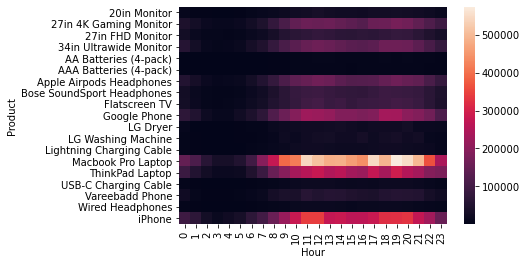

In [64]:
ax = sns.heatmap(tle)

In [68]:
bests = most.groupby(['Product']).sum()
bests

Quantity Ordered  Price Each      Profit    Hour
Product                                                                     
20in Monitor                            4129   451068.99   454148.71   58764
27in 4K Gaming Monitor                  6244  2429637.70  2435097.56   90916
27in FHD Monitor                        7550  1125974.93  1132424.50  107540
34in Ultrawide Monitor                  6199  2348718.19  2355558.01   89076
AA Batteries (4-pack)                  27635    79015.68   106118.40  298342
AAA Batteries (4-pack)                 31017    61716.59    92740.83  297332
Apple Airpods Headphones               15661  2332350.00  2349150.00  223304
Bose SoundSport Headphones             13457  1332366.75  1345565.43  192445
Flatscreen TV                           4819  1440000.00  1445700.00   68815
Google Phone                            5532  3315000.00  3319200.00   79479
LG Dryer                                 646   387600.00   387600.00    9326
LG Washing Machine                       666   399600.00   399600.00    9785
Lightning Charging Cable               23217   323787.10   347094.15  312529
Macbook Pro Laptop                      4728  8030800.00  8037600.00   68261
ThinkPad Laptop                         4130  4127958.72  4129958.70   59746
USB-C Charging Cable                   23975   261740.85   286501.25  314645
Vareebadd Phone                         2068   826000.00   827200.00   29472
Wired Headphones                       20557   226395.18   246478.43  271720
iPhone                                  6849  4789400.00  4794300.00   98657

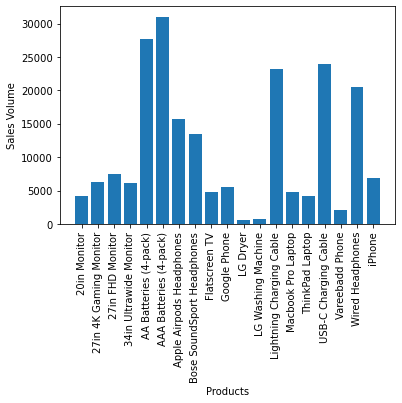

In [69]:
products = [product for product,prd_name in most.groupby('Product') ]
yaxi = bests['Quantity Ordered']
plt.bar(products,yaxi)
plt.xticks(rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Sales Volume')

plt.show()
